In [2]:
import numpy as np
import scipy.special as sp
import random
from matplotlib import pyplot as plt
from itertools import permutations

z is a list that contains the solutions to the Bethe equations:\\

$z_i^L = -\prod_{j=1}^N\left( -\frac{1 + z_i z_j - \Delta z_i}{1 + z_i z_j - \Delta z_j}\right), \quad i =1, 2, \dots, N$

So, $z  = [z_1, z_2, \dots, z_N]$

In [3]:
def M(z, i, j, d):
    return d*( 1 + z[i]*z[i] - d*z[i] )/((1 + z[i]*z[j] - d*z[j])*(1 + z[i]*z[j] - d*z[i]))

The following function gives the matrix for the coefficients

In [4]:
def Cmat(z, d, L):
    n = len(z)
    diag =0
    mat = [[ - M(z, i, j, d) for i in range(n)] for j in range(n) ]
    for i in range(n):
        diag = sum(mat[i]) +M(z, i, i, d)
        mat[i][i] = -diag + (L/z[i])
    return(mat)

In [5]:
def Coeff(y, z, d, L):
    n = len(z)
    terms = [ z[i]**(y[i]+1) for i in range(n)] 
    coeff = np.prod(terms)
    coeff = coeff*np.linalg.det(Cmat(z, d, L))
    coeff = 1/coeff
    return coeff

In [6]:
z = [1,2,3]
y = [1,2,3]
d = 1
L = 2
Coeff(y, z, d, L)

0.00016325464459463873

In [7]:
Cmat([1,2,3], 1, 10)

[[13.833333333333334, -1.5, -2.3333333333333335],
 [-0.5, 5.85, -0.35],
 [-0.3333333333333333, -0.15, 3.816666666666667]]

In [8]:
list(permutations(range(3)))

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]

In [9]:
def inversions(s):
    n = len(s)
    inv = []
    for i in range(n):
        for j in range(i+1, n):
            if s[i] > s[j]:
                inv.append((s[i],s[j]))
    return inv

In [10]:
inversions((0,2,1))

[(2, 1)]

In [11]:
def A(z, s, d):
    n = len(z)
    inv = inversions(s)
    terms = [ -(1 + z[i[0]]*z[i[1]] - d*z[i[0]])/(1 + z[i[0]]*z[i[1]] - d*z[i[1]]) for i in inv]
    return np.prod(terms)

In [12]:
z = [1,2]
s = (1,0)
d=4
A(z, s, d)

-5.0

In [27]:
def eigenfun(x, z, d):
    n = len(z)
    per = list(permutations(range(n)))
    final_term=0
    term = 0
    for s in per:
        term = A(z, s,d)
        for i in range(n):
            term = term*(z[s[i]]**(x[i]))
        final_term = final_term + term
    return final_term

The following code uses vectors instead of for loops. This should speed up the code if we do it everywhere. Right now, there is a bug on the following cell, but it could be fixed.

In [14]:
def eigenfun(x, z, d):
    n = len(z)
    per = list(permutations(range(n)))
    final_term=0
    term = 0
    for s in per:
        term = A(z, s,d)
        zs = z[np.array(s)]**x
        term = term*np.prod(zs)
        final_term = final_term + term
    return final_term

# Solutions to the Bethe equations

In [15]:
def BE(z,i,d):
    n = len(z)
    term=1
    for j in range(n):
        term= term*(-1)*((1 + z[i]*z[j] - d*z[i])/(1 + z[i]*z[j] - d*z[j]))
    return -term

In [16]:
BE((1,2), 1, 0)

-1.0

In [17]:
def seq_update(z,d,L):
    n = len(z)
    w = []
    for i in range(n):
        pol = [1]
        pol.extend([0]*(L-1))
        pol.append(- BE(z, i, d))
        roots = np.roots(pol)
        roots = [x-z[i] for x in roots]
        w.append(min(roots, key=np.abs) + z[i])
    return w

In [18]:
def BE_sol_initial(I,L):
    n = len(I)
    pol = [1]
    pol.extend([0]*(L-1))
    pol.append((-1)**n)
    roots = np.roots(pol)
    sol =[]
    for i in I:
        sol.append(roots[i])
    return sol

In [19]:
BE_sol_initial((1,2), 4)

[(-0.7071067811865477-0.7071067811865476j),
 (0.7071067811865471+0.7071067811865469j)]

In [20]:
def tuple_combinations(N,L):
    def helper(current_tuple, index):
        
        if index == N:
            result.append(current_tuple)
            return
        if index ==0:
            for i in range(L):
                helper(current_tuple + (i,), index+1)
        else:
            for i in range(current_tuple[-1]+1, L):
                helper(current_tuple + (i,), index+1) 
    result = []
    helper(tuple(), 0)
    return result

In [21]:
N=1
L=10
print(tuple_combinations(N,L))

[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)]


In [22]:
N=2
L=3
config = []
all_config = tuple_combinations(N,L)
for z in all_config:
    config.extend(list(permutations(z)))
print(config)

[(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1)]


In [23]:
if 1 in (0,1):
    print(1)

1


In [24]:
def BE_all_sol(N,L,d,updates):
    all_tuples = tuple_combinations(N,L)
    sol = []
    for I in all_tuples:
        initial = BE_sol_initial(I,L)
        for k in range(updates):
            initial = seq_update(initial, d, L)
        sol.append(initial)
    return sol

In [25]:
BE_all_sol(3,10, 0.1, 10)

[[(-1-2.220446049250313e-16j),
  (-0.8037782485982655+0.5949290101182719j),
  (-0.8037782485982654-0.5949290101182715j)],
 [(-0.9999484167750523-0.010156957667793454j),
  (-0.8101158392864806+0.5862698414016898j),
  (-0.2975546439229566+0.9547047888640144j)],
 [(-0.9999923933041777+0.0039004273851085403j),
  (-0.8022195162176718+0.5970291850483367j),
  (-0.2943588920128165-0.955694952740144j)],
 [(-0.9998630272006974-0.01655073524220929j),
  (-0.8175386262159596+0.5758737662412822j),
  (0.33853239763336074+0.9409547362932014j)],
 [(-0.9999472403409959+0.010272124143752337j),
  (-0.8002420857927908+0.5996770832089581j),
  (0.33274274318264696-0.9430176386787738j)],
 [(-0.999624153064737+0.027414459863483787j),
  (-0.7968441558096933+0.6041848983150249j),
  (0.8362013620275066-0.5484225397841906j)],
 [(-0.9946070167458779-0.10371539056411183j),
  (-0.9852809625339186+0.17094275319017027j),
  (0.9976967532135861+0.06783206194021202j)],
 [(-0.9996241530647372+0.027414459863475127j),
  (-0.

# Checking initial conditions

In [28]:
N=4
L=7
d=0.01
ord_sol = BE_all_sol(N,L, d, 10)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))
config = []
all_config = tuple_combinations(N,L)
#print(all_config)
trans_mat = [ [ np.abs(sum([Coeff(y, z, d, L)*eigenfun(x, z, d) for z in all_sol])) for y in all_config] for x in all_config]
print(np.matrix(trans_mat))

[[1.00000000e+00 4.44982004e-16 4.03185127e-16 ... 1.29469871e-15
  1.10974649e-15 1.31840732e-15]
 [4.51077841e-16 1.00000000e+00 4.28788472e-16 ... 4.02252989e-16
  4.78815497e-16 1.13181547e-15]
 [5.32137913e-16 7.81865741e-16 1.00000000e+00 ... 2.98675502e-16
  1.85450175e-16 1.01793617e-15]
 ...
 [8.40923092e-16 3.86742276e-16 4.98450084e-17 ... 1.00000000e+00
  4.14133441e-16 6.99758831e-16]
 [7.83018495e-16 5.14453669e-16 3.64955528e-16 ... 3.48820461e-16
  1.00000000e+00 3.62422580e-16]
 [7.34967466e-16 6.66783230e-16 1.31966027e-15 ... 7.57674845e-16
  2.69954584e-16 1.00000000e+00]]


In [28]:
N=2
L=3
d=0.01
ord_sol = BE_all_sol(N,L, d, 100)
ord_sol[2][1]**L - BE(ord_sol[2], 1, d)

(-8.881784197001252e-16-1.9081958235744878e-17j)

In [29]:
N=2
L=3
d=0.01
ord_sol = BE_all_sol(N,L, d, 10)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))
config = []
all_config = tuple_combinations(N,L)
#print(all_config)
trans_mat = [ [ np.abs(sum([Coeff(y, z, d, L)*eigenfun(x, z, d) for z in all_sol])) for y in all_config] for x in all_config]
print(np.matrix(trans_mat))

[[1.00000000e+00 0.00000000e+00 2.78940083e-16]
 [2.77555756e-16 1.00000000e+00 1.68830575e-16]
 [1.11022302e-16 2.78940083e-16 1.00000000e+00]]


In [30]:
N=2
L=5
d=0.1
y=[-1,-1]
ord_sol = BE_all_sol(N,L, d, 10)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))
[Coeff(y, z, d, L) for z in all_sol]

[(0.012604368615870352-0.03879225778555262j),
 (0.012604368615870356-0.03879225778555262j),
 (0.012604368615870352+0.03879225778555262j),
 (0.012604368615870356+0.03879225778555262j),
 (-0.033161908385960226-0.024093536752217697j),
 (-0.03316190838596021-0.024093536752217683j),
 (-0.033161908385960226+0.024093536752217697j),
 (-0.03316190838596021+0.024093536752217683j),
 (0.04026623367940392+0j),
 (0.04026623367940392+0j),
 (-0.030604906692462387+0.0222357662777098j),
 (-0.03060490669246238+0.022235766277709804j),
 (0.012275661153956936+0.03778060024147512j),
 (0.012275661153956936+0.03778060024147512j),
 (0.012275661153956936-0.03778060024147512j),
 (0.012275661153956936-0.03778060024147512j),
 (-0.030604906692462387-0.0222357662777098j),
 (-0.03060490669246238-0.022235766277709804j),
 (0.03934541680603301+0j),
 (0.03934541680603301+0j)]

In [31]:
N=2
L=5
d=0.1
y=[-1,-1]
ord_sol = BE_all_sol(N,L, d, 10)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))
print(all_sol)

[((-0.9999004932239451-0.014106865367932042j), (-0.29556981885742095+0.9553211408634221j)), ((-0.29556981885742095+0.9553211408634221j), (-0.9999004932239451-0.014106865367932042j)), ((-0.9999004932239451+0.014106865367932042j), (-0.29556981885742095-0.9553211408634221j)), ((-0.29556981885742095-0.9553211408634221j), (-0.9999004932239451+0.014106865367932042j)), ((-0.9982161702461375-0.059703244963180246j), (0.8426665326923637+0.5384358036760089j)), ((0.8426665326923637+0.5384358036760089j), (-0.9982161702461375-0.059703244963180246j)), ((-0.9982161702461375+0.059703244963180246j), (0.8426665326923637-0.5384358036760089j)), ((0.8426665326923637-0.5384358036760089j), (-0.9982161702461375+0.059703244963180246j)), ((-0.2910397456371137+0.9567109628615555j), (-0.2910397456371137-0.9567109628615555j)), ((-0.2910397456371137-0.9567109628615555j), (-0.2910397456371137+0.9567109628615555j)), ((-0.26950246119552274+0.9629997006279674j), (0.7840690931242393+0.6206735512387601j)), ((0.78406909312

# Paritition Function

In [32]:
def energy(z,d):
    return sum([i +1/i - 2*d for i in z])

In [33]:
def partition(sol,d,b):
    return sum([np.exp(-b*energy(z,d)) for z in sol])

In [34]:
def sum_energy(sol, d, b):
    return sum([ energy(z,d)*np.exp(-b*energy(z,d))for z in sol] )

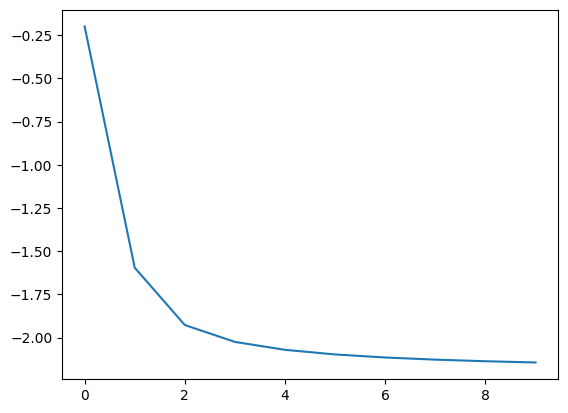

In [417]:
N=1
L=51
d=0.1
ord_sol = BE_all_sol(N,L, d, 10)
all_config = tuple_combinations(N,L)
part = [ partition(ord_sol, d, b) for b in range(10)]
avg_ene = [sum_energy(ord_sol, d, b)/(partition(ord_sol, d, b)) for b in range(10) ]
plt.plot(range(10), avg_ene)

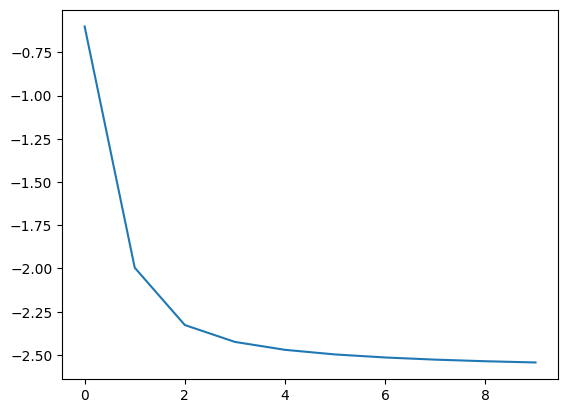

In [425]:
N=1
L=51
d=0.3
ord_sol = BE_all_sol(N,L, d, 100)
all_config = tuple_combinations(N,L)
part = [ partition(ord_sol, d, b) for b in range(10)]
avg_ene = [sum_energy(ord_sol, d, b)/(partition(ord_sol, d, b)) for b in range(10) ]
plt.plot(range(10), avg_ene)

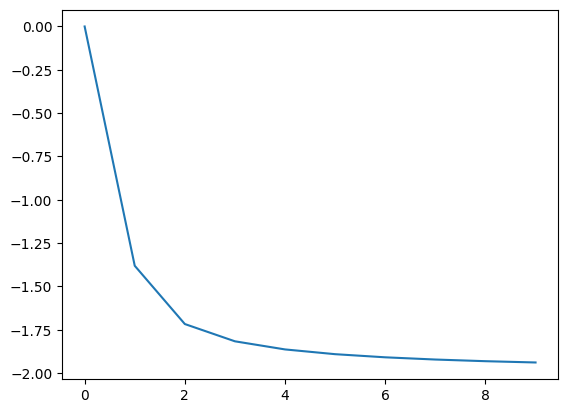

In [426]:
N=2
L=51
d=0
ord_sol = BE_all_sol(N,L, d, 10)
all_config = tuple_combinations(N,L)
part = [ partition(ord_sol, d, b) for b in range(10)]
avg_ene = [sum_energy(ord_sol, d, b)/(N*partition(ord_sol, d, b)) for b in range(10) ]
plt.plot(range(10), avg_ene)

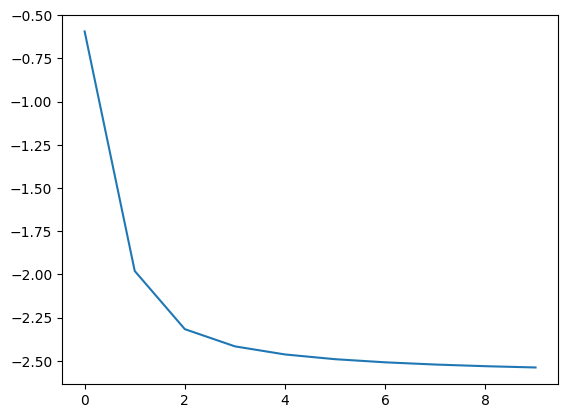

In [427]:
N=2
L=51
d=0.3
ord_sol = BE_all_sol(N,L, d, 10)
all_config = tuple_combinations(N,L)
part = [ partition(ord_sol, d, b) for b in range(10)]
avg_ene = [sum_energy(ord_sol, d, b)/(N*partition(ord_sol, d, b)) for b in range(10) ]
plt.plot(range(10), avg_ene)

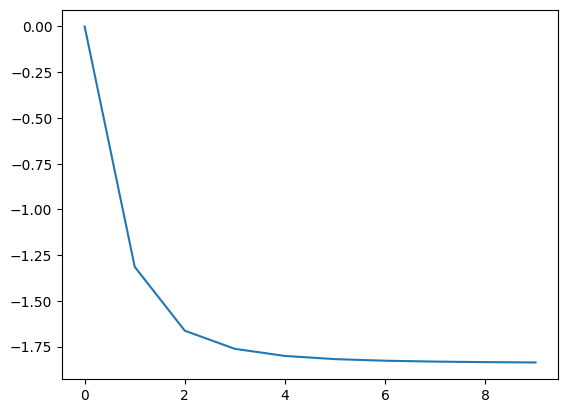

In [428]:
N=2
L=11
d=0
ord_sol = BE_all_sol(N,L, d, 10)
all_config = tuple_combinations(N,L)
part = [ partition(ord_sol, d, b) for b in range(10)]
avg_ene = [sum_energy(ord_sol, d, b)/(N*partition(ord_sol, d, b)) for b in range(10) ]
plt.plot(range(10), avg_ene)

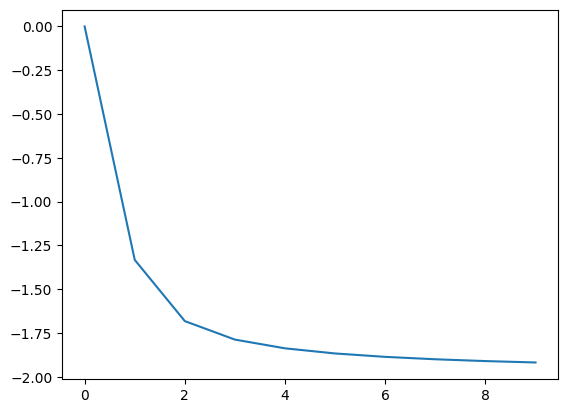

In [429]:
N=5
L=51
d=0
ord_sol = BE_all_sol(N,L, d, 10)
all_config = tuple_combinations(N,L)
part = [ partition(ord_sol, d, b) for b in range(10)]
avg_ene = [sum_energy(ord_sol, d, b)/(N*partition(ord_sol, d, b)) for b in range(10) ]
plt.plot(range(10), avg_ene)

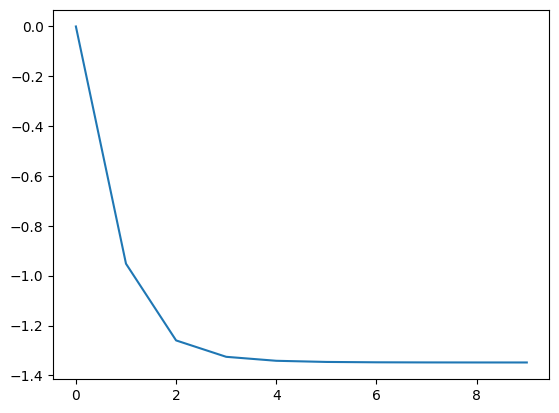

In [430]:
N=5
L=11
d=0
ord_sol = BE_all_sol(N,L, d, 10)
all_config = tuple_combinations(N,L)
part = [ partition(ord_sol, d, b) for b in range(10)]
avg_ene = [sum_energy(ord_sol, d, b)/(N*partition(ord_sol, d, b)) for b in range(10) ]
plt.plot(range(10), avg_ene)

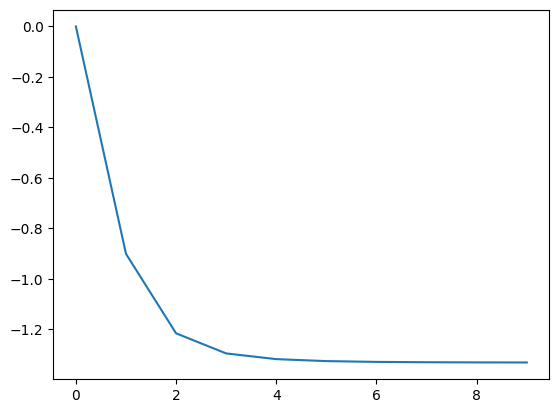

In [431]:
N=8
L=17
d=0
ord_sol = BE_all_sol(N,L, d, 10)
all_config = tuple_combinations(N,L)
part = [ partition(ord_sol, d, b) for b in range(10)]
avg_ene = [sum_energy(ord_sol, d, b)/(N*partition(ord_sol, d, b)) for b in range(10) ]
plt.plot(range(10), avg_ene)

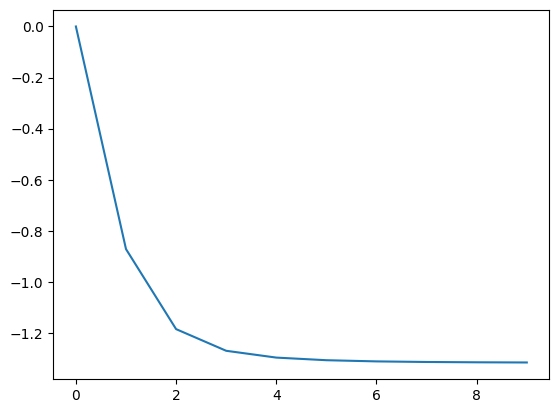

In [432]:
N=12
L=25
d=0
ord_sol = BE_all_sol(N,L, d, 10)
all_config = tuple_combinations(N,L)
part = [ partition(ord_sol, d, b) for b in range(10)]
avg_ene = [sum_energy(ord_sol, d, b)/(N*partition(ord_sol, d, b)) for b in range(10) ]
plt.plot(range(10), avg_ene)

# One-point function

In [107]:
N=2
L=5
d=0
ord_sol = BE_all_sol(N,L, d, 10)
all_config = tuple_combinations(N,L)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

In [108]:
def sub_config_one(j,all_config):
    config = []
    for x in all_config:
        if j in x:
            config.append(x)
    return config

In [109]:
N=1
L=5
j=2
all_C = tuple_combinations(N,L)
subC = sub_config_one(j, all_C)
print(subC)

[(2,)]


In [110]:
def prob_config(y, x, t, sols, d, L):
    terms = [Coeff(y, z, d, L)*eigenfun(x, z, d)*np.exp(-1j*t*energy(z, d)) for z in sols]
    return np.abs(sum(terms))**2

In [111]:
N=1
L=5
t=1
d=0
all_C = tuple_combinations(N,L)
y = [2 + i for i in range(N)]
ord_sol = BE_all_sol(N,L, d, 10)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))
[prob_config(y, x, t, all_sol, d, L) for x in all_C]

[0.14114770734256593,
 0.3336897520252522,
 0.050325081264363365,
 0.33368975202525325,
 0.1411477073425651]

In [112]:
def prob_one(y, x_one , t,sols, d, L, all_config):
    subC = sub_config_one(x_one, all_config)
    terms = [ prob_config(y, x, t, sols, d, L) for x in subC]
    return sum(terms)

In [113]:
N=2
L=5
t=10
d=0.1
y = [2 + i for i in range(N)]
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, 100)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))
dist = [prob_one(y, x, t, all_sol, d, L, all_C) for x in range(L)]
print(dist)
print(sum(dist))

[0.40098598918058476, 0.43191219114463075, 0.3675948142650681, 0.367594814265078, 0.4319121911446398]
2.0000000000000013


In [114]:
L= 11
N= 1
IC_one = [int(L/2)]
d=0
acc=10
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, acc)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

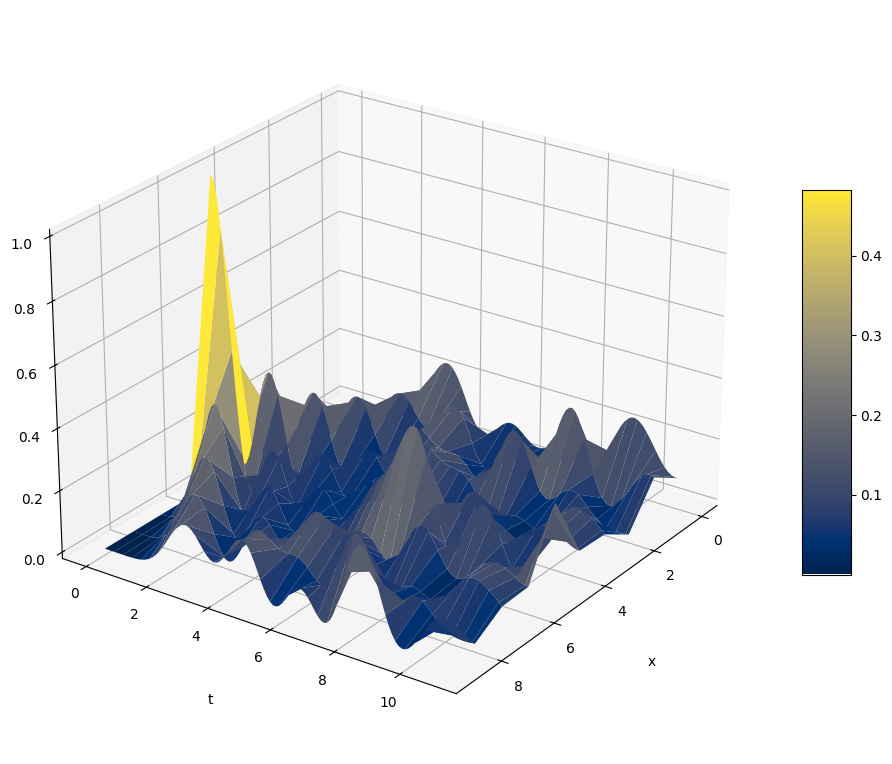

In [115]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


x = np.arange(0, L-1, 1)
t = np.arange(0, L, 0.1)


X, T = np.meshgrid(x, t)
Z = np.array([[prob_one(IC_one, x1, t1 , all_sol, d, L, all_C)  for x1 in x] for t1 in t])
#Z = prob_one(Step_IC, X, T, all_sol, d, N, L)

surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()

In [116]:
L= 5
N= int(L/2)
Step_IC = [int(L/4) + i for i in range(N)]
d=0
acc=10
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, acc)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

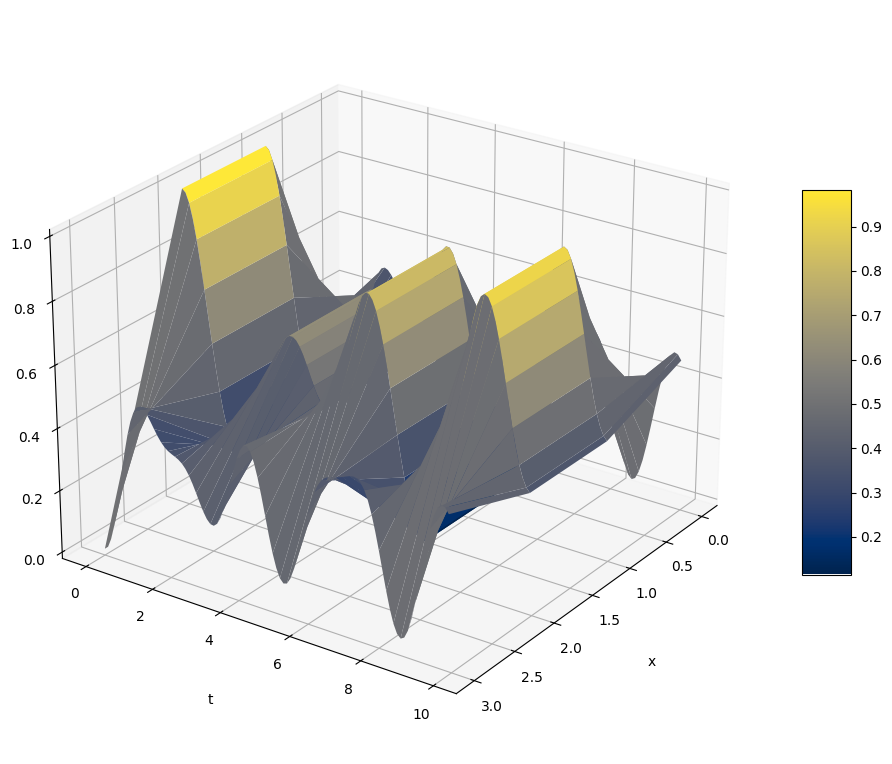

In [117]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


x = np.arange(0, L-1, 1)
t = np.arange(0, 2*L, 0.1)


X, T = np.meshgrid(x, t)
Z = np.array([[prob_one(Step_IC, x1, t1 , all_sol, d, L, all_C)  for x1 in x] for t1 in t])
#Z = prob_one(Step_IC, X, T, all_sol, d, N, L)

surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()

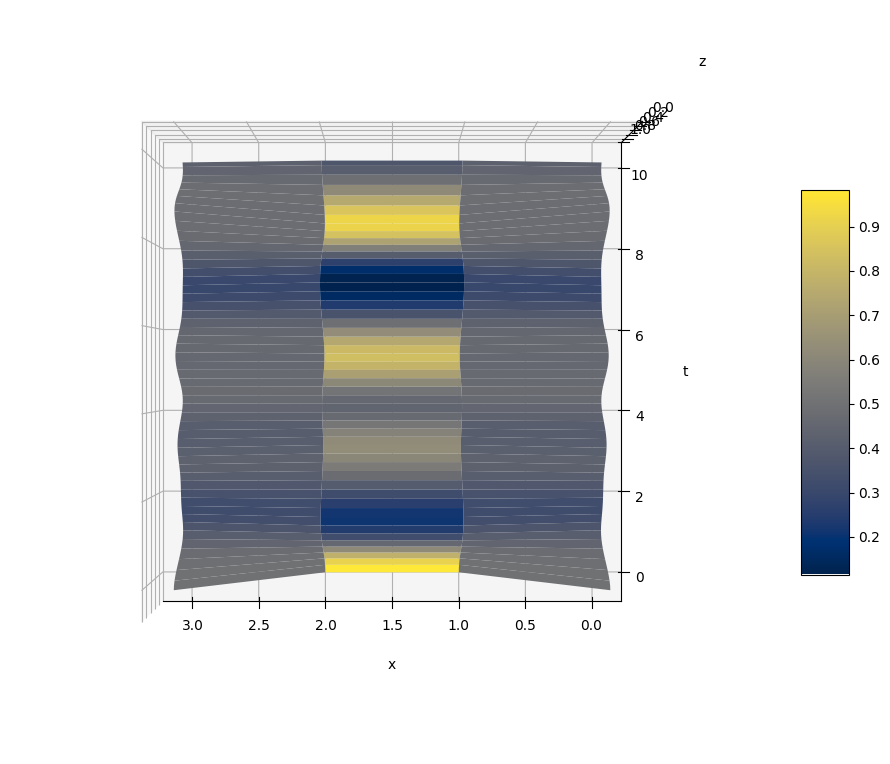

In [118]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(270, 270)

plt.show()

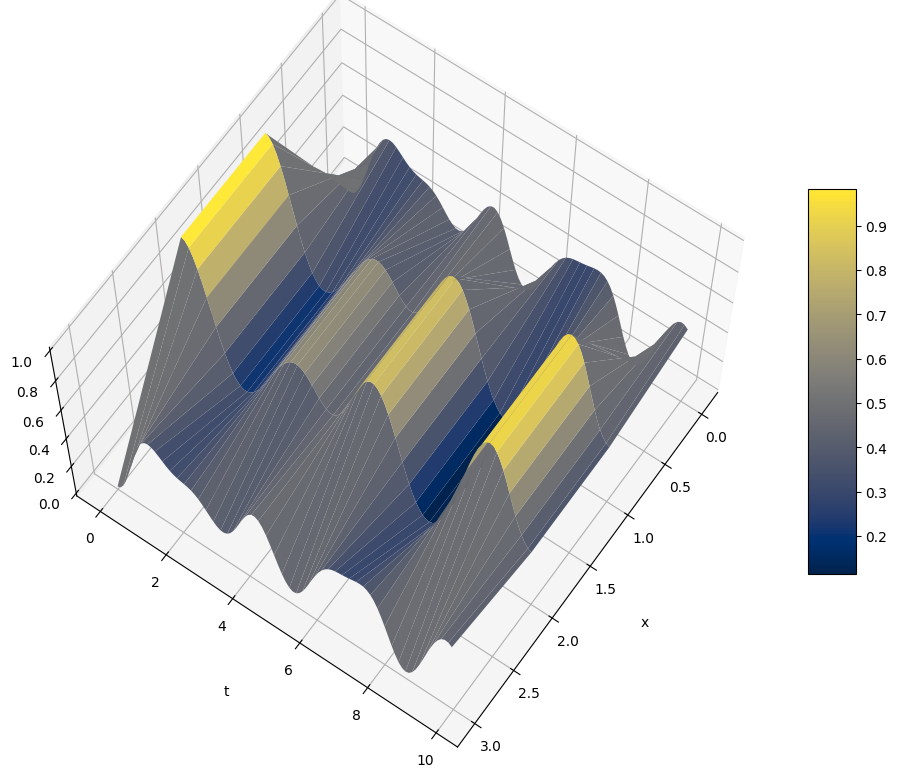

In [119]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(65, 35)

plt.show()

In [120]:
L= 7
N= int(L/2)
Step_IC = [int(L/4) + i for i in range(N)]
d=0
acc=10
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, acc)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

In [121]:
x = np.arange(0, L-1, 1)
t = np.arange(0, (1/4)*L, 0.1)


X, T = np.meshgrid(x, t)
Z = np.array([[prob_one(Step_IC, x1, t1 , all_sol, d, L, all_C)  for x1 in x] for t1 in t])

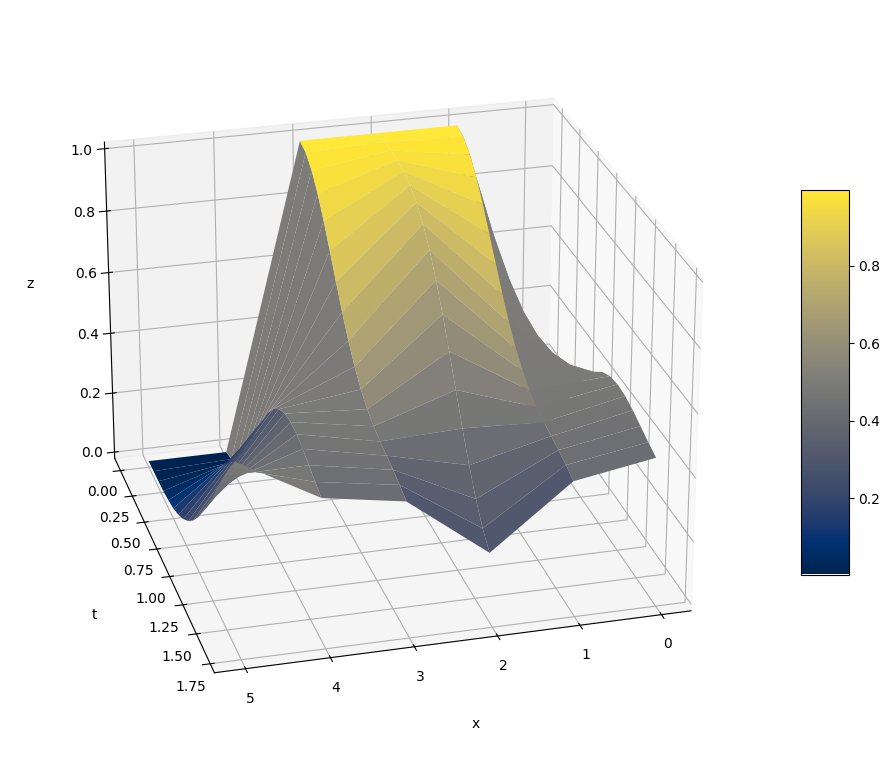

In [122]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 75)

plt.show()

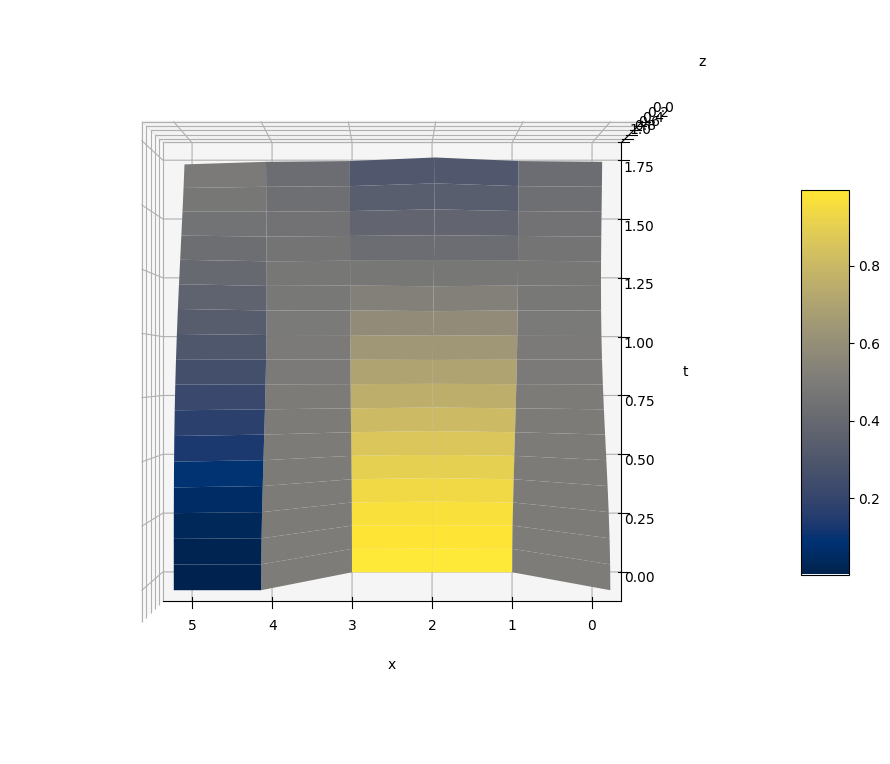

In [123]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(270, 270)

plt.show()

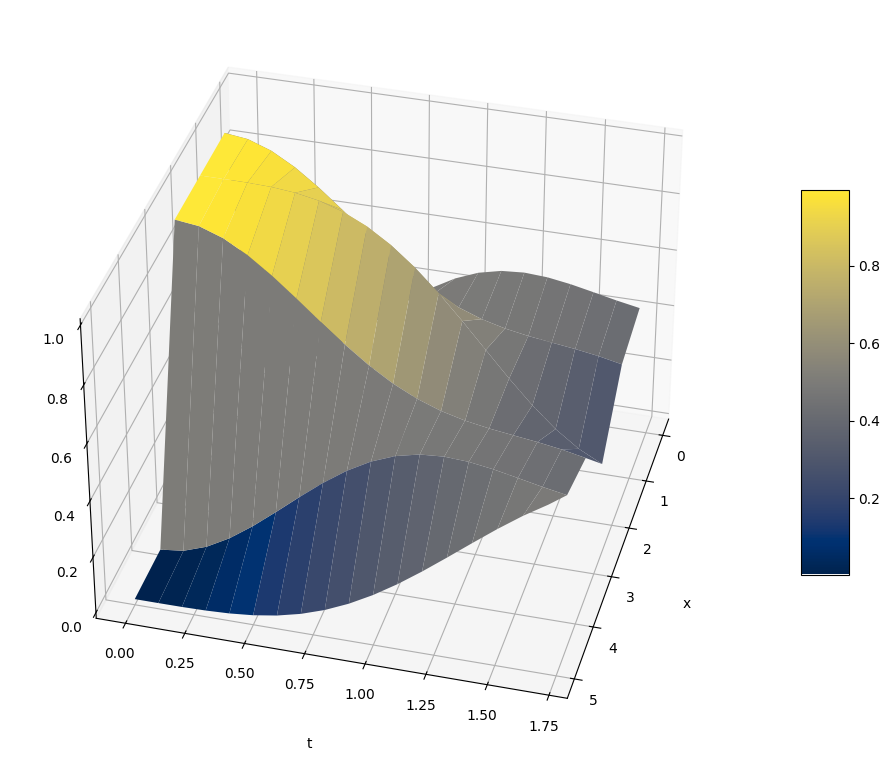

In [124]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(35, 15)

plt.show()

In [125]:
L= 9
N= int(L/2)
Step_IC = [int(L/4) + i for i in range(N)]
d=0
acc=10
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, acc)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

In [77]:
x = np.arange(0, L-1, 1)
t = np.arange(0, (1/4)*L, 0.1)


X, T = np.meshgrid(x, t)
Z = np.array([[prob_one(Step_IC, x1, t1 , all_sol, d, L, all_C)  for x1 in x] for t1 in t])

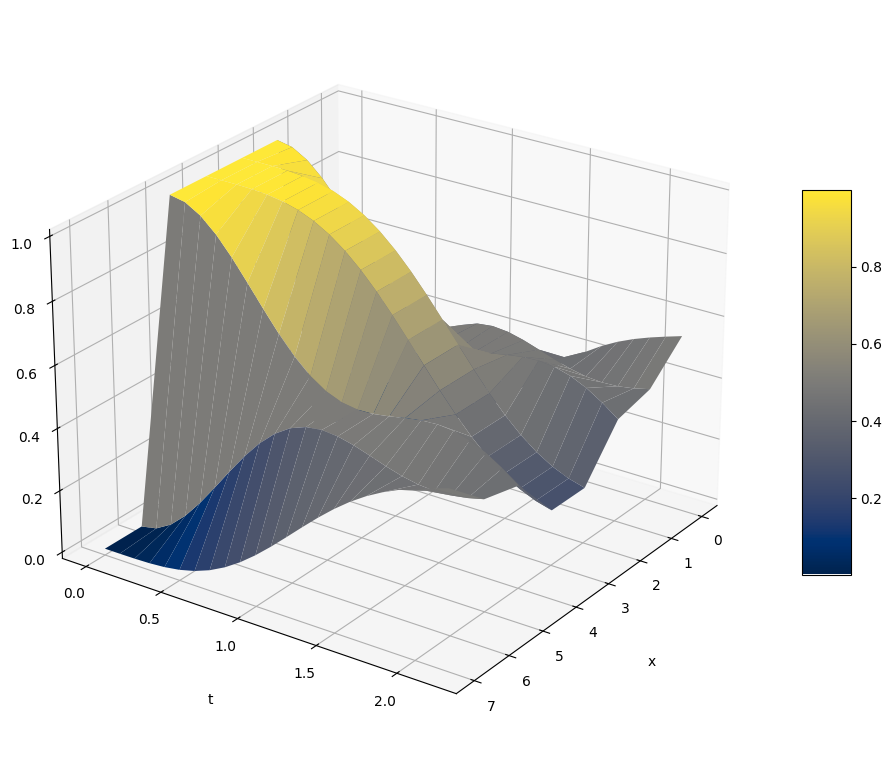

In [78]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()

In [ ]:
L= 9
N= 2
Step_IC = [int(L/2) - int(N/2) + i  for i in range(N)]
d=0
acc=10
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, acc)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

In [ ]:
x = np.arange(0, L-1, 1)
t = np.arange(0, (1/4)*L, 0.1)


X, T = np.meshgrid(x, t)
Z = np.array([[prob_one(Step_IC, x1, t1 , all_sol, d, L, all_C)  for x1 in x] for t1 in t])

# One-point function, again

In [164]:
N=2
L=5
d=0
ord_sol = BE_all_sol(N,L, d, 10)
all_config = tuple_combinations(N,L)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

In [86]:
def subCv2(j,config):
    sC = []
    N= len(config)
    for n in range(N):
        if j in config[n]:
            sC.append(n)
    return(sC)

In [95]:
def sum_terms(y, aS, aC, d, L):
    return [[ Coeff(y, z, d, L)*eigenfun(x, z, d) for x in aC] for z in aS]

In [136]:
def prob_configv2(x_index, t, aS, sT,d):
    N = len(aS)
    terms = [sT[k][x_index]*np.exp(-1j*energy(aS[k],d)*t) for k in range(N)]
    return(np.abs(sum(terms))**2)

In [144]:
def prob_one_v2(x_one , t,aS, aC, sT,d):
    subConfig = subCv2(x_one, aC)
    terms = [prob_configv2(k, t, aS, sT,d) for k in subConfig]
    return(sum(terms))

In [165]:
L= 11
N= 1
IC_one = [int(L/2)]
d=0
acc=10
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, acc)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

In [166]:
all_T = sum_terms(IC_one, all_sol, all_C, d, L)

In [167]:
x = np.arange(0, L-1, 1)
t = np.arange(0, L, 0.1)


X, T = np.meshgrid(x, t)
Z = np.array([[prob_one_v2(x1, t1 , all_sol, all_C, all_T,d)  for x1 in x] for t1 in t])
#Z = prob_one(Step_IC, X, T, all_sol, d, N, L)

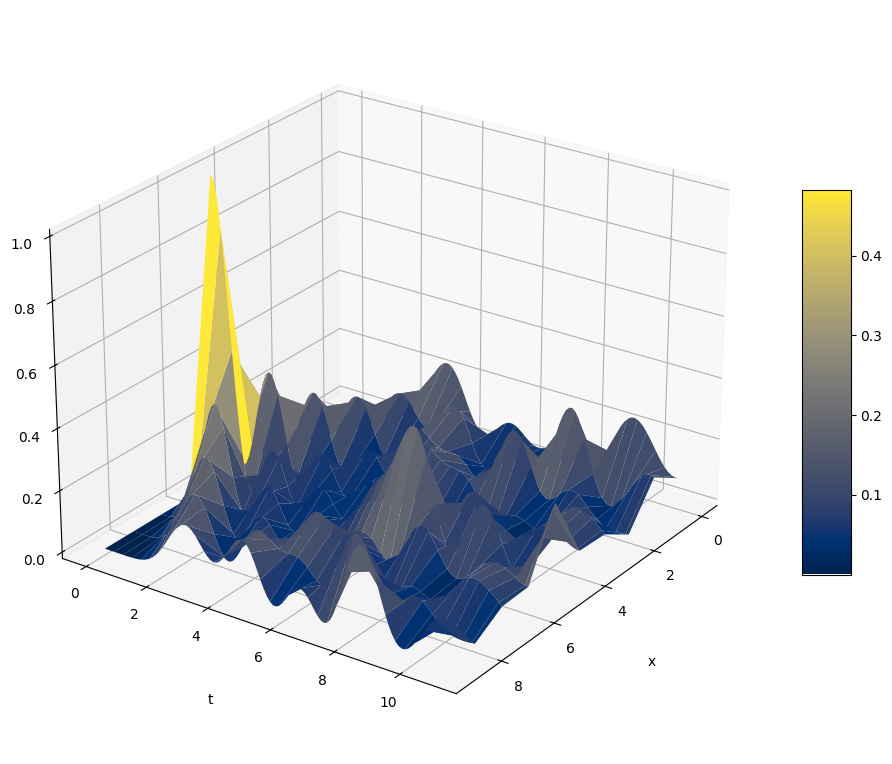

In [168]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()

In [149]:
L= 7
N= int(L/2)
Step_IC = [int(L/4) + i for i in range(N)]
d=0
acc=10
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, acc)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

In [150]:
all_T = sum_terms(Step_IC, all_sol, all_C, d, L)

In [151]:
x = np.arange(0, L-1, 1)
t = np.arange(0, L, 0.1)


X, T = np.meshgrid(x, t)
Z = np.array([[prob_one_v2(x1, t1 , all_sol, all_C, all_T,d)  for x1 in x] for t1 in t])

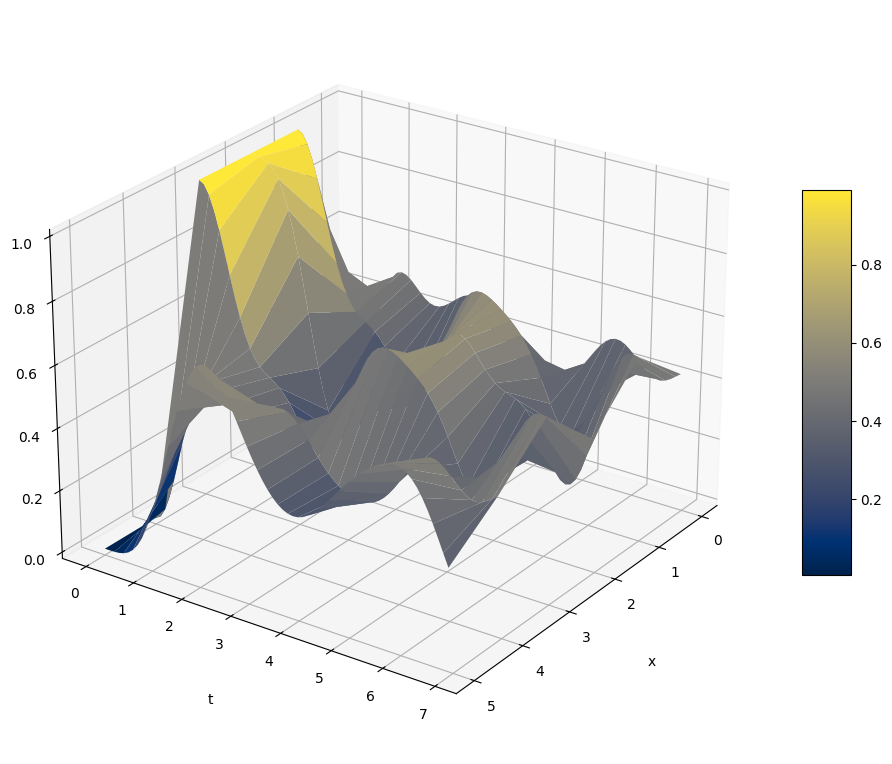

In [152]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()

In [153]:
L= 9
N= int(L/2)
Step_IC = [int(L/4) + i for i in range(N)]
d=0
acc=10
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, acc)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

In [154]:
all_T = sum_terms(Step_IC, all_sol, all_C, d, L)

In [155]:
x = np.arange(0, L-1, 1)
t = np.arange(0, L/4, 0.1)


X, T = np.meshgrid(x, t)
Z = np.array([[prob_one_v2(x1, t1 , all_sol, all_C, all_T,d)  for x1 in x] for t1 in t])

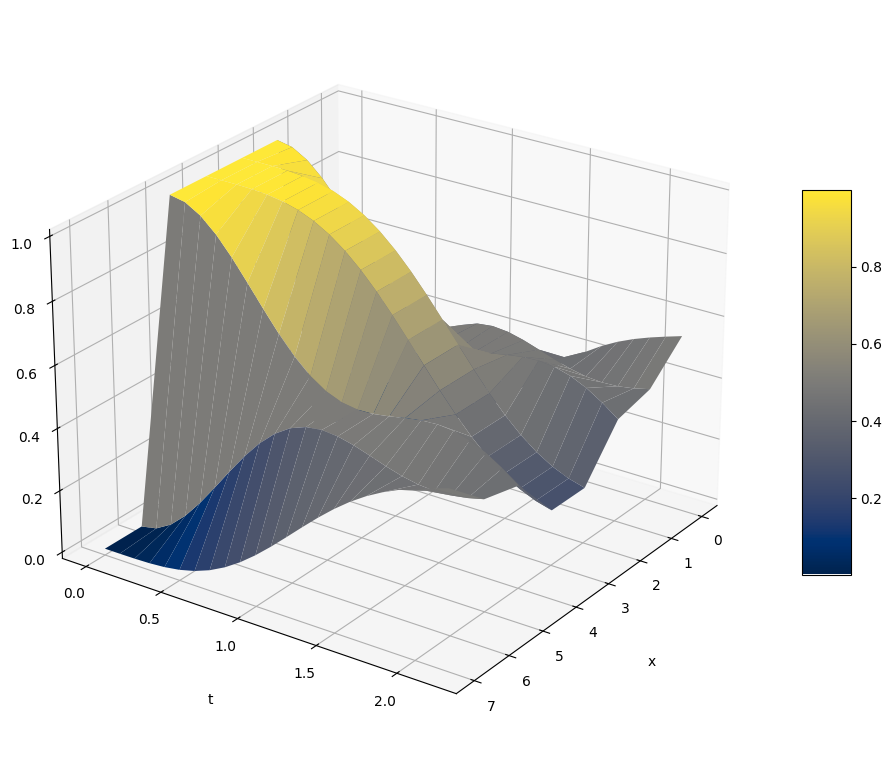

In [156]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()

In [173]:
L= 21
N= 2
IC = [int(L/2)-1, int(L/2)]
d=0
acc=10
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, acc)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

In [174]:
all_T = sum_terms(IC, all_sol, all_C, d, L)

In [175]:
x = np.arange(0, L-1, 1)
t = np.arange(0, L, 0.1)


X, T = np.meshgrid(x, t)
Z = np.array([[prob_one_v2(x1, t1 , all_sol, all_C, all_T,d)  for x1 in x] for t1 in t])

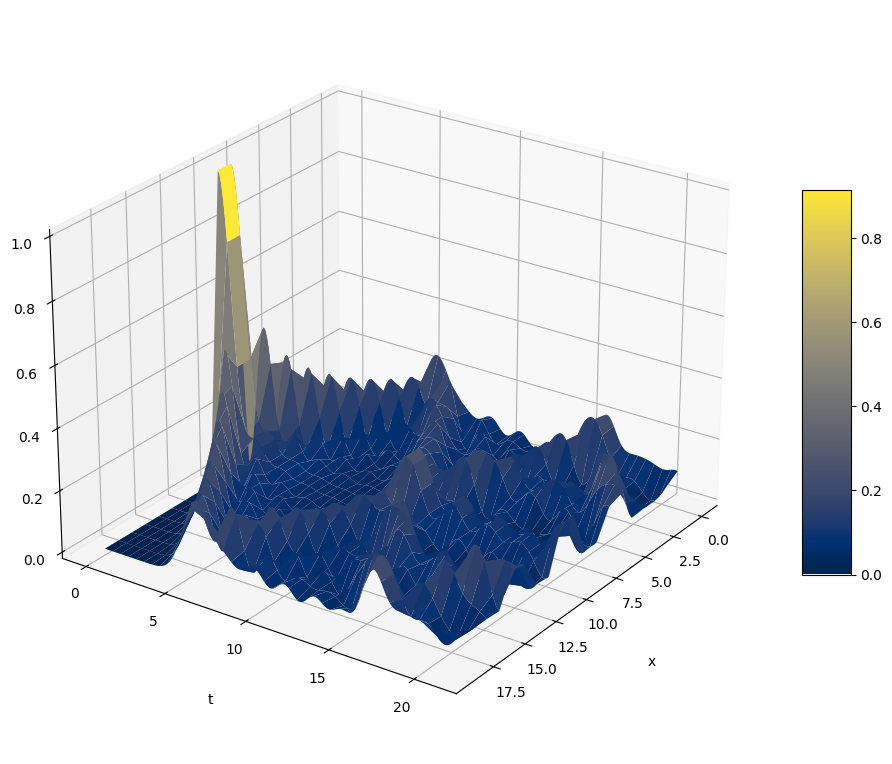

In [176]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()

In [177]:
L= 21
N= 2
IC = [int(L/2)-1, int(L/2)]
d=0.1
acc=10
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, acc)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

In [178]:
all_T = sum_terms(IC, all_sol, all_C, d, L)

In [179]:
x = np.arange(0, L-1, 1)
t = np.arange(0, L, 0.1)


X, T = np.meshgrid(x, t)
Z = np.array([[prob_one_v2(x1, t1 , all_sol, all_C, all_T,d)  for x1 in x] for t1 in t])

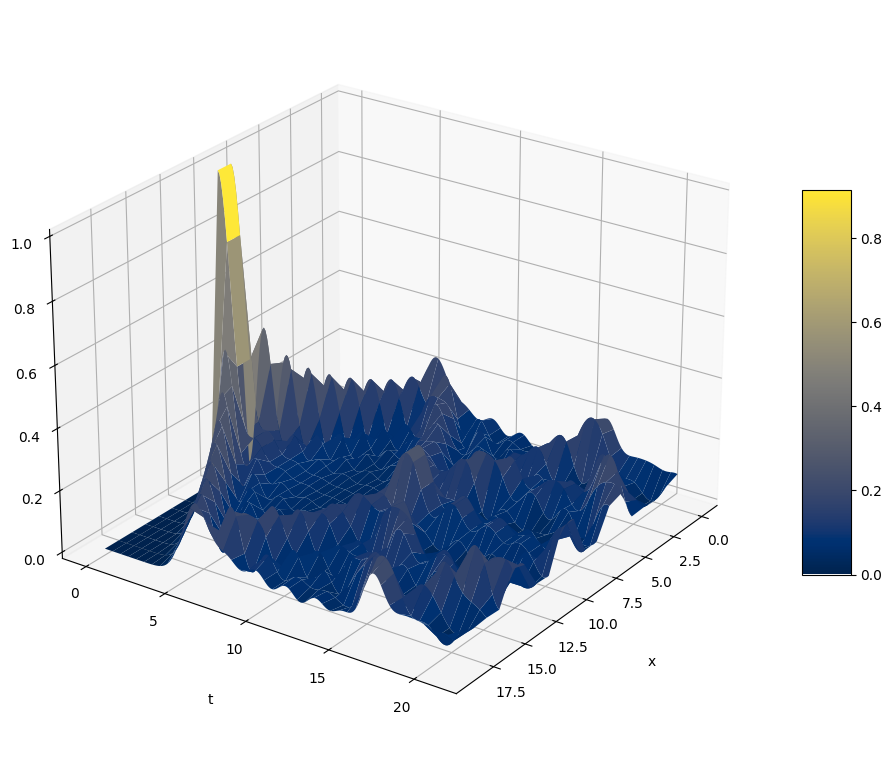

In [180]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()

In [181]:
L= 21
N= 4
IC = [int(L/2)-2, int(L/2)-1, int(L/2) , int(L/2)+1]
d=0
acc=10
all_C = tuple_combinations(N,L)
ord_sol = BE_all_sol(N,L, d, acc)
all_sol =[]
for z in ord_sol:
    all_sol.extend(list(permutations(z)))

In [182]:
all_T = sum_terms(IC, all_sol, all_C, d, L)

In [ ]:
x = np.arange(0, L-1, 1)
t = np.arange(0, L, 0.1)


X, T = np.meshgrid(x, t)
Z = np.array([[prob_one_v2(x1, t1 , all_sol, all_C, all_T,d)  for x1 in x] for t1 in t])

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(X, T, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('t', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

ax.view_init(25, 35)

plt.show()